<h3>Tópicos em Big Data: Brazzilian tweets about Covid 19 </h3>

In [70]:
!pip install wordcloud

In [71]:
import numpy as np
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from csv import reader

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer 
from nltk.probability import FreqDist
from nltk.tokenize import blankline_tokenize
## Simple WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marnes.simao.cassule\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!


<p> Lendo o arquivoCsv </p>

In [39]:
tweetsBrazillian = pd.read_csv("BrazillianTweet.csv", encoding = "ISO-8859-1")
print("Total records: ", len(tweetsBrazillian))
tweetsBrazillian.head()

Total records:  7990


,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1.250570e+18,7.941206e+08,2020-04-16T00:00:12Z,josemarceloroch,Vendo a quantidade de dificuldades que principalmente as pessoas desempregadas estão passando é de corta o coração?? sr.Raimundo Q sirva pra de exemplo pra Todos nós.!!!\n#COVID19 \n#JN https://t.co/Ernqux9KGp,Twitter for Android,NaN,NaN,NaN,False,...,0,BR,"Caldas Novas, Brasil",city,81,396,NaN,8/31/2012 12:44,False,pt
1,1.250570e+18,1.049430e+18,2020-04-16T00:00:35Z,Pe_de_Jambo,Meu feed é resumido em: #BBB2O e #COVID19,Twitter for Android,NaN,NaN,NaN,False,...,0,BR,"Salvador, Brazil",city,23,93,NaN,10/8/2018 19:57,False,pt
2,1.250570e+18,6.914149e+07,2020-04-16T00:00:45Z,ThiagoRBrandao,"""Seu José "" madrugando na fila em Madureira(...) Apareceu uma empresária iluminada por Deus para lhe dar um emprego! Graças a Deus! @STJnoticias @JornalOGlobo @jornalnacional @RedeGlobo #COVID19",Twitter for Android,NaN,NaN,NaN,False,...,0,BR,"Rio de Janeiro, Brazil",city,857,937,NaN,8/26/2009 21:07,False,pt
3,1.250570e+18,1.625409e+08,2020-04-16T00:01:06Z,marceloblax,#COVID19 #coronavirusbrasil https://t.co/4o13AfU9I3,Twitter for Android,NaN,NaN,NaN,False,...,0,BR,"Belém, Brazil",city,369,736,NaN,7/3/2010 21:21,False,und
4,1.250580e+18,1.091420e+18,2020-04-16T00:01:52Z,CampoLimpoNotic,#Saúde\nLevantamento de óbitos pelo coronavírus de acordo com cada subprefeitura.\nFicar em casa é a medida mais importante para evitar que o Covid-19 se espalhe.\n\n#CampoLimpoZonaSul #ZonaSul #ZonaSulNoticias #CampoLimpo #CampoLimpoNotícias #Covid19 #CoronavírusSãoPaulo https://t.co/MCo7bl4mzJ,Twitter for Android,NaN,NaN,NaN,False,...,0,BR,"Sao Paulo, Brazil",city,34,165,NaN,2/1/2019 17:21,False,pt


In [40]:
#tweetsBrazillian.dtypes

In [8]:
tweetsBrazillian['friends_count'].max()

49352

In [41]:
tweetsBrazillian['favourites_count'].max()

352572

In [42]:
tweetsBrazillian['verified'].describe()

count      7990
unique        2
top       False
freq       7697
Name: verified, dtype: object

In [43]:
tweetsBrazillian['retweet_count'].describe()

count    7990.000000
mean        1.248310
std        11.820566
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       672.000000
Name: retweet_count, dtype: float64

In [44]:
tweetsBrazillian['followers_count'].describe()

count    7.990000e+03
mean     5.446299e+03
std      5.162496e+04
min      0.000000e+00
25%      1.120000e+02
50%      4.030000e+02
75%      1.397000e+03
max      1.412153e+06
Name: followers_count, dtype: float64

<p> Eliminando colunas </p>

In [45]:
tweetsBrazillian.drop(['country_code', 'account_lang', 'status_id', 'user_id', 'account_created_at', 'reply_to_user_id', 'reply_to_status_id'], axis=1, inplace=True)       

In [46]:
print("Total records: ", len(tweetsBrazillian))
tweetsBrazillian.head(2)

Total records:  7990


,created_at,screen_name,text,source,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,place_full_name,place_type,followers_count,friends_count,verified,lang
0,2020-04-16T00:00:12Z,josemarceloroch,Vendo a quantidade de dificuldades que principalmente as pessoas desempregadas estão passando é de corta o coração?? sr.Raimundo Q sirva pra de exemplo pra Todos nós.!!!\n#COVID19 \n#JN https://t.co/Ernqux9KGp,Twitter for Android,NaN,False,False,834,0,"Caldas Novas, Brasil",city,81,396,False,pt
1,2020-04-16T00:00:35Z,Pe_de_Jambo,Meu feed é resumido em: #BBB2O e #COVID19,Twitter for Android,NaN,False,False,2285,0,"Salvador, Brazil",city,23,93,False,pt


In [47]:
tweetsBrazillian['source'].describe()

count                    7990
unique                     12
top       Twitter for Android
freq                     4163
Name: source, dtype: object

<p> Agrupando as plataformas </p>

In [48]:
platforms_used = tweetsBrazillian.groupby('source')
platforms_used = platforms_used[['text']].count()
print("Total records: ", len(platforms_used))
platforms_used

Total records:  12


,text
source,
Apphi,1
Echofon,1
Foursquare,3
Hootsuite Inc.,1
Instagram,1570
Tweetbot for i?S,15
Twitter Web Client,1
Twitter for Android,4163
Twitter for Mac,4


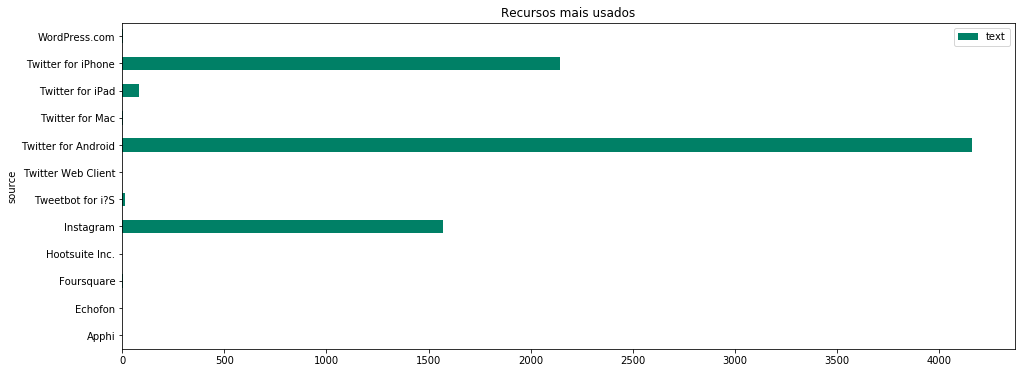

In [49]:
platforms_used.plot(kind='barh', stacked=False, figsize=[16,6], colormap='summer', title="Recursos mais usados")

In [51]:
tweetsBrazillian['place_full_name'].unique()

array(['Caldas Novas, Brasil', 'Salvador, Brazil',
       'Rio de Janeiro, Brazil', 'Belém, Brazil', 'Sao Paulo, Brazil',
       'Anápolis, Brasil', 'Brasília, Brazil',
       'Presidente Prudente, Brasil', 'Pirassununga, Brasil',
       'Blumenau, Brasil', 'Santarém, Brasil', 'Porto Alegre, Brazil',
       'Guarulhos, Brasil', 'Santos, Brasil', 'Puta que Pariu',
       'Empresarial Domingos Ferreira', 'Alto Parnaíba, Brasil',
       'Planalto, Brasil', 'Vila Velha, Brasil', 'Niterói, Brasil',
       'Santana, Brasil', 'Curitiba, Brazil', 'São Luís, Brazil',
       'São Félix do Araguaia, Brasil', 'Conde, Brasil',
       'Aracaju, Brazil', 'Tiago Aquines Advogado', 'Catalão, Brasil',
       'Guararapes, Brasil', 'Campina Grande, Brasil',
       'São Caetano do Sul, Brasil', 'Parnamirim, Brasil',
       'Cabo de Santo Agostinho, Brasil', 'São José de Ribamar, Brasil',
       'Palmas, Brazil', 'Paulista, Brasil', 'Nova Iguaçu, Brasil',
       'Recreio', 'Itapipoca, Brasil', 'Fortaleza, B

In [52]:
tweetsBrazillian['retweet_count'].describe()

count    7990.000000
mean        1.248310
std        11.820566
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       672.000000
Name: retweet_count, dtype: float64

In [53]:
influencer = tweetsBrazillian[tweetsBrazillian['followers_count'] > 9999]
print("Total records: ", len(influencer))
influencer.head()

Total records:  576


,created_at,screen_name,text,source,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,place_full_name,place_type,followers_count,friends_count,verified,lang
10,2020-04-16T00:07:25Z,PrefeituraBNU,"Confira aqui o Boletim Coronavírus Blumenau atualizado, com os assuntos abordados na live de hoje: https://t.co/er9hCqqeRi\n\nInforme-se pelos meios oficiais e não compartilhe Fake News.\n\n#Coronavírus #FiqueEmCasa #UseMáscara #BlumenauContraoCoronavírus https://t.co/3DAIgFn7pV",Twitter for iPhone,NaN,False,False,312,2,"Blumenau, Brasil",city,15309,162,True,pt
11,2020-04-16T00:07:35Z,cgisaopaulo,#StayHomeStaySafe \n#FightAgainstCoronavirus https://t.co/Ub605F5xAX,Twitter for Android,NaN,True,False,446,0,"Sao Paulo, Brazil",city,10007,492,True,und
45,2020-04-16T00:51:22Z,jnascim,#Covid19 - Casos  Mortes (15/4):\n???? 637359  28364\n???? 180659  18812\n???? 165155  21645\n???? 134753  3804\n???? 134582  17188\n???? 99489  12894\n???? 83356  3346\n???? 76389  4777\n???? 69392  1518\n???? 33573  4440\n???? 28610  1757\n???? 28316  3145\n?? 2060927  134354 htt...,Twitter for iPhone,jnascim,False,False,39248,4,"Sao Paulo, Brazil",city,40291,4300,True,ca
49,2020-04-16T01:01:34Z,jnascim,"Mesmo com subnotificação, Brasil é 11° país do mundo em número de casos e mortes pela #Covid19, tendo já 52% e 46% dos totais de mortes de ???? e ????, respectivamente, mesmo tendo apenas 34% e 21% da soma de casos desses países (Fonte: @JohnsHopkins) https://t.co/7otBUsomZo",Twitter for iPhone,NaN,True,False,39248,6,"Sao Paulo, Brazil",city,40291,4300,True,pt
59,2020-04-16T01:12:58Z,CmdoCMS,"Porto Alegre/RS. Em 15 abril, 30 militares do 3º Regimento de Cavalaria de Guarda realizaram a descontaminação da parte externa do Quartel General do CMS e do Comando Geral da Brigada Militar, dificultando a disseminação da #COVID19. @exercitooficial @DefesaGovBr @brigadamilitar_ https://t.co/Ke...",Twitter for iPhone,NaN,False,False,7318,39,"Porto Alegre, Brazil",city,93594,17,True,pt


In [54]:
influencer_retweeted = influencer[influencer['is_retweet'] == False]

maiorRetweet = influencer_retweeted[influencer_retweeted['retweet_count'] == 672]

maiorRetweet = maiorRetweet.replace(r'\n',  ' ', regex=True)
print("Total records: ", len(maiorRetweet))
maiorRetweet

Total records:  1


,created_at,screen_name,text,source,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,place_full_name,place_type,followers_count,friends_count,verified,lang
2411,2020-04-19T19:19:02Z,LemusteleSUR,-Avanza el #Covid19 y Bolsonaro va a un acto que aglomera apoyadores contra la cuarentena. -Pide cierre del congreso y corte suprema. -El viernes retiró reglas que exigían marcación y registro de armas. -Su hijo twittea bolsonaristas que festejan a disparos. Cómo se cura esto? https://t.co/D3Lh...,Twitter for iPhone,NaN,False,False,6330,672,"Sao Paulo, Brazil",city,15373,2569,False,es


In [55]:
pd.options.display.max_colwidth = 300

In [56]:
RETWEET = str(maiorRetweet.text)

<p> Recuperando o Tweets com mais retweet

In [57]:
RETWEET.replace('\\n', '')

'2411    -Avanza el #Covid19 y Bolsonaro va a un acto que aglomera apoyadores contra la cuarentena. -Pide cierre del congreso y corte suprema. -El viernes retiró reglas que exigían marcación y registro de armas. -Su hijo twittea bolsonaristas que festejan a disparos.  Cómo se cura esto? https://t.co/D3Lh...\nName: text, dtype: object'

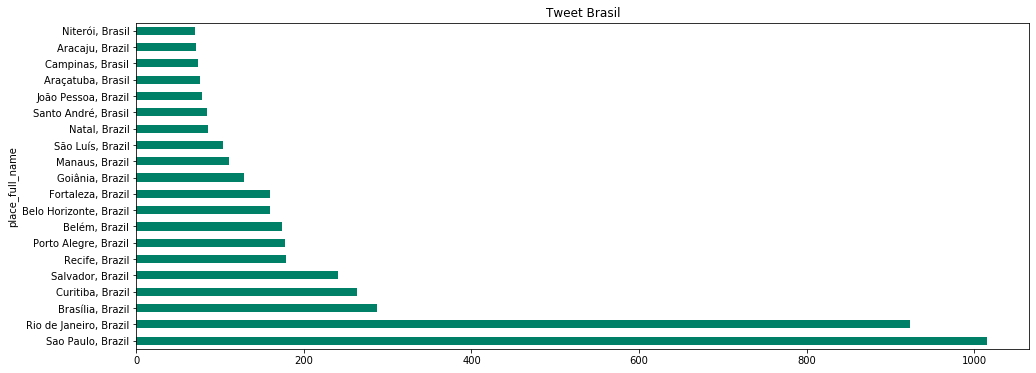

In [26]:
#placesMoreTweets =
tweets_brasil = tweetsBrazillian.groupby('place_full_name')['text'].count().sort_values(ascending=False).head(20)


tweets_brasil.plot(kind='barh', stacked=False, figsize=[16,6], colormap='summer', title="Tweet Brasil")

In [58]:
tweets_brasil = tweetsBrazillian.groupby('place_full_name')['text'].count().sort_values(ascending=False).head(20)
tweets_brasil

place_full_name
Sao Paulo, Brazil         1015
Rio de Janeiro, Brazil     924
Brasília, Brazil           287
Curitiba, Brazil           263
Salvador, Brazil           241
Recife, Brazil             179
Porto Alegre, Brazil       178
Belém, Brazil              174
Belo Horizonte, Brazil     160
Fortaleza, Brazil          159
Goiânia, Brazil            129
Manaus, Brazil             110
São Luís, Brazil           103
Natal, Brazil               85
Santo André, Brasil         84
João Pessoa, Brazil         78
Araçatuba, Brasil           76
Campinas, Brasil            73
Aracaju, Brazil             71
Niterói, Brasil             70
Name: text, dtype: int64

In [29]:
tweets_in_sp = tweetsBrazillian[tweetsBrazillian['place_full_name'] == 'Sao Paulo, Brazil']
print("Total records: ", len(tweets_in_sp))
tweets_in_sp.head()

Total records:  1015


,created_at,screen_name,text,source,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,place_full_name,place_type,followers_count,friends_count,verified,lang
4,2020-04-16T00:01:52Z,CampoLimpoNotic,#Saúde\nLevantamento de óbitos pelo coronavírus de acordo com cada subprefeitura.\nFicar em casa é a medida mais importante para evitar que o Covid-19 se espalhe.\n\n#CampoLimpoZonaSul #ZonaSul #ZonaSulNoticias #CampoLimpo #CampoLimpoNotícias #Covid19 #CoronavírusSãoPaulo https://t.co/MCo7bl4mzJ,Twitter for Android,NaN,False,False,343,0,"Sao Paulo, Brazil",city,34,165,False,pt
6,2020-04-16T00:03:35Z,cadu_filmes,Campanha 3 - Juntos contra o Coronavírus!\n.\n#fiqueemcasa #juntoscontraocoronavirus #novocoronavirus #coronavirus #covid19 #cadufilmes #caduragem https://t.co/rBB06s9LaQ https://t.co/xoCZ7xfrVz,Twitter for Android,NaN,False,False,205,1,"Sao Paulo, Brazil",city,24,60,False,pt
11,2020-04-16T00:07:35Z,cgisaopaulo,#StayHomeStaySafe \n#FightAgainstCoronavirus https://t.co/Ub605F5xAX,Twitter for Android,NaN,True,False,446,0,"Sao Paulo, Brazil",city,10007,492,True,und
38,2020-04-16T00:39:56Z,Mo_Americanoid,"In times of coronavirus weve got to be united - one for all, all for one #cats #gatos #covid19 #quarantine ?? @ São Paulo, Brazil https://t.co/VUNLYsK2fI",Instagram,NaN,False,False,38339,0,"Sao Paulo, Brazil",city,2340,990,False,en
45,2020-04-16T00:51:22Z,jnascim,#Covid19 - Casos  Mortes (15/4):\n???? 637359  28364\n???? 180659  18812\n???? 165155  21645\n???? 134753  3804\n???? 134582  17188\n???? 99489  12894\n???? 83356  3346\n???? 76389  4777\n???? 69392  1518\n???? 33573  4440\n???? 28610  1757\n???? 28316  3145\n?? 2060927  134354 htt...,Twitter for iPhone,jnascim,False,False,39248,4,"Sao Paulo, Brazil",city,40291,4300,True,ca


<h4> Entendendo os tweets em SP </h4>

In [59]:
words = []
words_String=''
for text in tweets_in_sp['text']:
    words.append(text.replace('\n', ' '))
    
for item in words:
    words_String = words_String + item
    
words_String

'#Saúde Levantamento de óbitos pelo coronavírus de acordo com cada subprefeitura. Ficar em casa é a medida mais importante para evitar que o Covid-19 se espalhe.  #CampoLimpoZonaSul #ZonaSul #ZonaSulNoticias #CampoLimpo #CampoLimpoNotícias #Covid19 #CoronavírusSãoPaulo https://t.co/MCo7bl4mzJCampanha 3 - Juntos contra o Coronavírus! . #fiqueemcasa #juntoscontraocoronavirus #novocoronavirus #coronavirus #covid19 #cadufilmes #caduragem https://t.co/rBB06s9LaQ https://t.co/xoCZ7xfrVz#StayHomeStaySafe  #FightAgainstCoronavirus https://t.co/Ub605F5xAXIn times of coronavirus we\x92ve got to be united - one for all, all for one #cats #gatos #covid19 #quarantine ?? @ São Paulo, Brazil https://t.co/VUNLYsK2fI#Covid19 - Casos \x95 Mortes (15/4): ???? 637359 \x95 28364 ???? 180659 \x95 18812 ???? 165155 \x95 21645 ???? 134753 \x95 3804 ???? 134582 \x95 17188 ???? 99489 \x95 12894 ???? 83356 \x95 3346 ???? 76389 \x95 4777 ???? 69392 \x95 1518 ???? 33573 \x95 4440 ???? 28610 \x95 1757 ???? 28316 \x

In [87]:
word_tokens = word_tokenize(words_String)
len(word_tokens)

33872

In [88]:
tk = WhitespaceTokenizer()
wordHashTags = tk.tokenize(words_String)
len(wordHashTags)
#wordHashTags

22714

In [61]:
fdist = FreqDist()
for word in wordHashTags:
    fdist[word.lower()]+=1
fdist

FreqDist({'de': 668, 'e': 419, 'o': 416, '#covid19': 414, 'a': 396, '#coronavirus': 379, 'que': 339, 'em': 333, 'do': 286, 'da': 212, ...})

In [62]:
type(fdist)

nltk.probability.FreqDist

In [63]:
df_word = pd.DataFrame(list(fdist.items()), columns = ["Word","Frequency"])
print("Total records: ", len(df_word))
df_word.head()

Total records:  8366


,Word,Frequency
0,#saúde,7
1,levantamento,1
2,de,668
3,óbitos,10
4,pelo,35


In [36]:
fdist_text = fdist.most_common(100)
type(fdist_text)
fdist_text

[('de', 668),
 ('e', 419),
 ('o', 416),
 ('#covid19', 414),
 ('a', 396),
 ('#coronavirus', 379),
 ('que', 339),
 ('em', 333),
 ('do', 286),
 ('da', 212),
 ('no', 196),
 ('com', 161),
 ('não', 154),
 ('para', 152),
 ('é', 151),
 ('na', 136),
 ('se', 134),
 ('#covid_19', 134),
 ('.', 127),
 ('#quarentena', 114),
 ('são', 113),
 ('por', 111),
 ('??', 110),
 ('um', 104),
 ('mais', 93),
 ('os', 93),
 ('#fiqueemcasa', 92),
 ('uma', 84),
 ('#coronavírus', 78),
 ('#pandemia', 73),
 ('paulo,', 70),
 ('as', 70),
 ('brazil', 66),
 ('????', 64),
 ('ao', 62),
 ('brasil', 60),
 ('sobre', 56),
 ('está', 56),
 ('dos', 52),
 ('#ficaemcasa', 51),
 ('tem', 48),
 ('como', 46),
 ('#covid', 43),
 ('pra', 42),
 ('já', 41),
 ('vai', 39),
 ('pessoas', 39),
 ('contra', 38),
 ('mortes', 37),
 ('pandemia', 36),
 ('você', 36),
 ('pelo', 35),
 ('-', 35),
 ('#bolsonarogenocida', 35),
 ('nos', 35),
 ('#covid?19', 35),
 ('#corona', 35),
 ('ser', 34),
 ('#coronavirusbrasil', 34),
 ('eu', 33),
 ('\x95', 32),
 ('mundo', 

In [67]:
tokensBlank = blankline_tokenize(words_String)
len(tokensBlank)

1

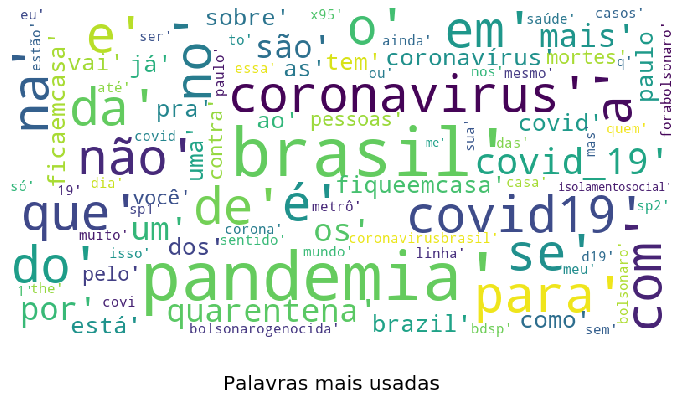

In [72]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = "Palavras mais usadas"):
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=2,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(fdist_text)

<h3> 100 palavras mais usadas pelos internautas do Rio de Janeiro </h3>

In [89]:
tweets_in_RJ = tweetsBrazillian[tweetsBrazillian['place_full_name'] == 'Rio de Janeiro, Brazil']
print("Total records: ", len(tweets_in_RJ))
tweets_in_RJ.head()

Total records:  924


,created_at,screen_name,text,source,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,place_full_name,place_type,followers_count,friends_count,verified,lang
2,2020-04-16T00:00:45Z,ThiagoRBrandao,"""Seu José "" madrugando na fila em Madureira(...) Apareceu uma empresária iluminada por Deus para lhe dar um emprego! Graças a Deus! @STJnoticias @JornalOGlobo @jornalnacional @RedeGlobo #COVID19",Twitter for Android,NaN,False,False,27983,0,"Rio de Janeiro, Brazil",city,857,937,False,pt
16,2020-04-16T00:10:41Z,thaissarosa,Descubra o erro\n#noticias24 #jantar #comida #comedia #Covid_19 #comedy #bbb #piada #Apple https://t.co/tHxefdldgB,Twitter for Android,NaN,False,False,5131,0,"Rio de Janeiro, Brazil",city,419,492,False,es
18,2020-04-16T00:11:01Z,obrunovalente,Angústia. Incerteza. Ansiedade. Estresse. Até onde vai isso tudo?! Tá foda\n#Covid_19,Twitter for iPhone,NaN,False,False,894,0,"Rio de Janeiro, Brazil",city,218,175,False,pt
19,2020-04-16T00:11:10Z,CelebridadesDas,@jornalnacional O diretor da OMS (@who Wolrd Health Organization) jantando o @realDonaldTrump. Trump WTF? #coronavirusbrasil #COVID19 #COVID?19 #CoronaVirusChallenge #CoronaCrisis,Twitter for Android,jornalnacional,False,False,1605,1,"Rio de Janeiro, Brazil",city,24,103,False,en
20,2020-04-16T00:11:15Z,Victor_com,#coronavirus #Covid_19 #BolsonaroTemRazao \n#gripezinha #AbortoNAO https://t.co/6uYCds9Gci,Twitter for Android,NaN,False,False,3474,1,"Rio de Janeiro, Brazil",city,7518,3142,False,und


In [103]:
wordsRJ = []
wordsRJ_String=''
for text in tweets_in_RJ['text']:
    wordsRJ.append(text.replace('\n', ' '))
    
for item in wordsRJ:
    wordsRJ_String = wordsRJ_String + item
    
wordsRJ_String

'"Seu José " madrugando na fila em Madureira(...) Apareceu uma empresária iluminada por Deus para lhe dar um emprego! Graças a Deus! @STJnoticias @JornalOGlobo @jornalnacional @RedeGlobo #COVID19Descubra o erro #noticias24 #jantar #comida #comedia #Covid_19 #comedy #bbb #piada #Apple https://t.co/tHxefdldgBAngústia. Incerteza. Ansiedade. Estresse. Até onde vai isso tudo?! Tá foda #Covid_19@jornalnacional O diretor da OMS (@who Wolrd Health Organization) jantando o @realDonaldTrump. Trump WTF? #coronavirusbrasil #COVID19 #COVID?19 #CoronaVirusChallenge #CoronaCrisis#coronavirus #Covid_19 #BolsonaroTemRazao  #gripezinha #AbortoNAO https://t.co/6uYCds9GciBola fora os testes de anticorpos, a bala de prata de Trump para mandar as pessoas de volta ao trabalho, atestando que elas tiveram #COVID19 e agora estariam "imunizadas". Só que a FDA relaxou as regras e tem um monte de testes vagabundos no mercado.  https://t.co/gFTsWYGi6tTestes de anticorpos de boa qualidade, como os da Anitta, só terã

In [104]:
wordRJ_tokens = word_tokenize(wordsRJ_String)
len(wordRJ_tokens)

31474

In [105]:
tkRJ = WhitespaceTokenizer()
wordHashTagsRJ = tkRJ.tokenize(wordsRJ_String)
len(wordHashTagsRJ)
#wordHashTags

22097

In [106]:
fdistRJ = FreqDist()
for word in wordHashTagsRJ:
    fdistRJ[word.lower()]+=1
fdistRJ

FreqDist({'de': 734, 'a': 488, 'o': 453, 'e': 451, 'que': 363, '#covid19': 342, '#coronavirus': 327, 'do': 304, 'em': 295, '.': 258, ...})

In [107]:
type(fdistRJ)

nltk.probability.FreqDist

In [108]:
dfRJ_word = pd.DataFrame(list(fdistRJ.items()), columns = ["Word","Frequency"])
print("Total records: ", len(dfRJ_word))
dfRJ_word.head()

Total records:  7986


,Word,Frequency
0,"""seu",1
1,josé,1
2,"""",3
3,madrugando,1
4,na,127


In [109]:
fdistRJ_text = fdistRJ.most_common(100)
type(fdistRJ_text)
fdistRJ_text

[('de', 734),
 ('a', 488),
 ('o', 453),
 ('e', 451),
 ('que', 363),
 ('#covid19', 342),
 ('#coronavirus', 327),
 ('do', 304),
 ('em', 295),
 ('.', 258),
 ('da', 243),
 ('não', 197),
 ('é', 186),
 ('com', 164),
 ('para', 162),
 ('#covid_19', 150),
 ('no', 150),
 ('na', 127),
 ('um', 115),
 ('por', 103),
 ('os', 101),
 ('#quarentena', 98),
 ('se', 98),
 ('rio', 92),
 ('uma', 91),
 ('as', 85),
 ('mais', 83),
 ('??', 81),
 ('está', 75),
 ('tem', 74),
 ('pra', 62),
 ('ao', 58),
 ('#fiqueemcasa', 58),
 ('vai', 54),
 ('já', 54),
 ('como', 52),
 ('dos', 52),
 ('eu', 51),
 ('mas', 48),
 ('só', 45),
 ('#bolsonaro', 43),
 ('sem', 42),
 ('ou', 42),
 ('#pandemia', 42),
 ('sobre', 41),
 ('#covid', 41),
 ('foi', 40),
 ('saúde', 39),
 ('são', 39),
 ('ainda', 38),
 ('janeiro', 37),
 ('dia', 37),
 ('nos', 37),
 ('#forabolsonaro', 36),
 ('#coronavirusbrasil', 35),
 ('esse', 35),
 ('janeiro,', 35),
 ('-', 35),
 ('agora', 34),
 ('todos', 34),
 ('@jairbolsonaro', 34),
 ('pessoas', 33),
 ('contra', 33),
 ('g

In [110]:
tokensBlankRJ = blankline_tokenize(wordsRJ_String)
len(tokensBlankRJ)

1

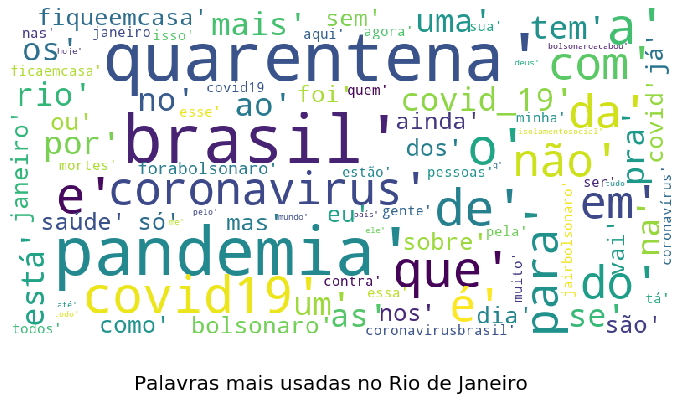

In [111]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = "Palavras mais usadas no Rio de Janeiro"):
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=2,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(fdistRJ_text)

In [113]:
tweetsBrazillian['favourites_count'].describe()

count      7990.000000
mean      11599.119900
std       26500.698989
min           0.000000
25%         297.000000
50%        2079.500000
75%        9467.000000
max      352572.000000
Name: favourites_count, dtype: float64

In [116]:
mostFavourited = tweetsBrazillian[tweetsBrazillian['favourites_count'] == 352572]
mostFavourited

,created_at,screen_name,text,source,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,place_full_name,place_type,followers_count,friends_count,verified,lang
7938,2020-04-30T22:15:31Z,vinicius_sj10,"Abril começou com 6836 casos confirmados e 241 mortes; hoje o mês se encerra com 85380 casos e 5091 mortes. Assustador!!! Fora a subnotificação, na real tem é muito mais!!!\n\nComo o Mandetta dizia em março, ""abril seria o pico"". Parece que foi, né?!\n\n#coronavirus #COVID?19 https://t.co/lClkRc...",Twitter for Android,NaN,True,False,352572,1,"Volta Redonda, Brasil",city,777,1349,False,pt


In [121]:
textFavourited = str(mostFavourited.text)

In [122]:
textFavourited.replace('\\n', '')

'7938    Abril começou com 6836 casos confirmados e 241 mortes; hoje o mês se encerra com 85380 casos e 5091 mortes. Assustador!!! Fora a subnotificação, na real tem é muito mais!!!Como o Mandetta dizia em março, "abril seria o pico". Parece que foi, né?!#coronavirus #COVID?19 https://t.co/lClkRc...\nName: text, dtype: object'